# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [80]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [91]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print(df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [16]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [17]:
df_raw.shape

(400, 4)

Answer: 400

#### Question 2. Create a summary table

In [ ]:
#function

In [65]:
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.317500,0.466087,0.00,0.00,0.000,1.00,1.0
gre,398.0,588.040201,115.628513,220.00,520.00,580.000,660.00,800.0
gpa,398.0,3.390930,0.380630,2.26,3.13,3.395,3.67,4.0
prestige,399.0,2.486216,0.945333,1.00,2.00,2.000,3.00,4.0


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: They are on different scale. GRE's valid range is [0,800] while GPA's valid range is [0,4]. 

#### Question 4. Drop data points with missing data


In [20]:
df=df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Count # of nan values in each column and confirm no null values exist

In [25]:
print(df.admit.isnull().sum())
print(df.gre.isnull().sum())
print(df.gpa.isnull().sum())
print(df.prestige.isnull().sum())

0
0
0
0


#### Question 6. Create box plots for GRE and GPA

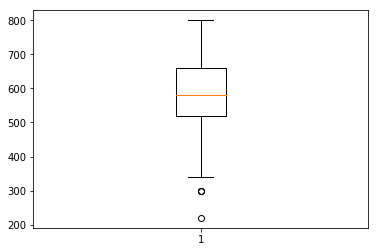

In [28]:
#boxplot 1
plt.boxplot(df.gre)
plt.show()

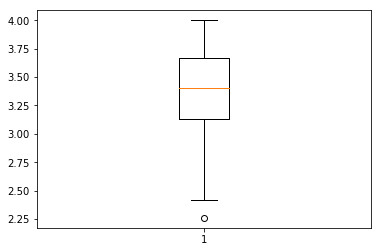

In [29]:
#boxplot 2 
plt.boxplot(df.gpa)
plt.show()

#### Question 7. What do this plots show?

Answer: boxplot for gre showed there are two outliers and someone scored a perfect score of 800. The median gre score is close to 600. boxplot for gpa showed there is 1 outlier and someone had a perfect GPA of 4.00. 

#### Question 8. Describe each distribution 

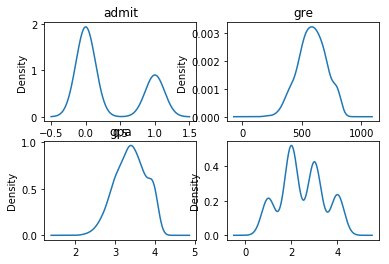

In [38]:
# plot the distribution of each variable 
fig, axes = plt.subplots(nrows=2, ncols=2)

df.admit.plot(kind='density',title='admit',ax=axes[0,0])
df.gre.plot(kind='density',title='gre',ax=axes[0,1])
df.gpa.plot(kind='density',title='gpa',ax=axes[1,0])
df.prestige.plot(kind='density',title='prestige',ax=axes[1,1])
plt.show()

distribution of admit has two modes at 0 and 1 since admit is a discrete variable with two levels 0 and 1;
distribution of gre has a single mode that's larger than 600;
distribution of gpa has a single mode between 3 and 4;
distribution of prestige has 4 modes at 1,2,3,4 since prestige is a discrete variable with 4 levels 1,2,3,4.

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. None of the variables are normally distributed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: I don't think any distribution needs correction. The dependent variable is a 0/1 variable so we will be using logistic regression in this case to predict a log odds ratio. One of the predictors prestige needs to be transformed into 3 dummy variables.

#### Question 11. Which of our variables are potentially colinear? 

In [40]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


None of our variables are potentially colinear.

#### Question 12. What did you find?

Answer: A weak correlation of .4 between gre and gpa.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Start with an EDA on the underlying data to understand the size and distribution of development sample; then move on to feature generation by creating dummy variables for prestige, log transforming both gre and gpa to correct any skewness; finally fit a logistic regression model with L2 regularization in scikit learn to uncover any correlation between admission chance and prestige of undergraduate schools by looking at the p-value/sign/magnitude of coefficient estimate. 

#### Question 14. What is your hypothesis? 

Answer: 
null hypothesis is there is no relationship between UCLA grad school admissions rates and prestige of undergraduate schools;
alternative hypothesis is there is a relationship between UCLA grad school admissions rates and prestige of undergraduate schools. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [41]:
df_new=df_raw[df_raw['admit'].notnull() & df_raw['gre'].notnull() & df_raw['gpa'].notnull() & df_raw['prestige'].notnull()]

In [42]:
df_new.shape

(397, 4)

In [43]:
df.shape

(397, 4)

#### 2. Bonus: Log transform the skewed data

In [82]:
for x in ['gre','gpa']:
    df_raw['log'+str(x)]=np.log(df_raw[str(x)])
print(df_raw.head())

   admit    gre   gpa  prestige    loggre    loggpa
0      0  380.0  3.61       3.0  5.940171  1.283708
1      1  660.0  3.67       3.0  6.492240  1.300192
2      1  800.0  4.00       1.0  6.684612  1.386294
3      1  640.0  3.19       4.0  6.461468  1.160021
4      0  520.0  2.93       4.0  6.253829  1.075002


In [47]:
df.head(5)

,admit,gre,gpa,prestige,log_gre,log_gpa
0,0,380.0,3.61,3.0,5.940171,1.283708
1,1,660.0,3.67,3.0,6.492240,1.300192
2,1,800.0,4.00,1.0,6.684612,1.386294
3,1,640.0,3.19,4.0,6.461468,1.160021
4,0,520.0,2.93,4.0,6.253829,1.075002


#### 3. Advanced: Impute missing data

## Using sample mean to impute missing values for numeric features

In [93]:
df_raw["gre"].fillna(df_raw["gre"].mean(), inplace=True)

In [94]:
df_raw["gpa"].fillna(df_raw["gpa"].mean(), inplace=True)

In [96]:
for x in ['gre','gpa']:
    df_raw['log'+str(x)]=np.log(df_raw[str(x)])
print(df_raw.head())

   admit    gre   gpa  prestige    loggre    loggpa
0      0  380.0  3.61       3.0  5.940171  1.283708
1      1  660.0  3.67       3.0  6.492240  1.300192
2      1  800.0  4.00       1.0  6.684612  1.386294
3      1  640.0  3.19       4.0  6.461468  1.160021
4      0  520.0  2.93       4.0  6.253829  1.075002


In [ ]:
## Using sample mode to impute missing values for categorical features
## mode returns a series and albeit with a single row, so when you pass 
## this to fillna it only fills the first row, so what you want is 
## to get the scalar value by indexing into the Series

In [112]:
df_raw["prestige"].mode()

0    2.0
dtype: float64

In [117]:
df_raw["prestige"].fillna(df_raw["prestige"].mode()[0], inplace=True)

In [118]:
df_raw["admit"].fillna(df_raw["admit"].mode()[0], inplace=True)

In [ ]:
## check missing values are replaced

In [119]:
df_raw.shape

(400, 6)

In [120]:
df=df_raw.dropna()

In [121]:
df.shape

(400, 6)